In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint

In [5]:
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
tag = '.tk5'
dtype = 'float32'
gl5shape = (2160, 4320)
hlfshape = (360, 720)
tk5shape = (48, 36)

# tokyo region
# "138 141 34 38"
one = 138
two = 141
three = 34
four = 38
upperindex = (90-four)*12
lowerindex = (90-three)*12
leftindex = (180+one)*12
rightindex = (180+two)*12
print(upperindex, lowerindex, leftindex, rightindex)

624 672 3816 3852


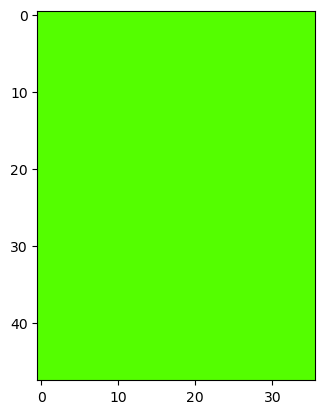

In [50]:
#file_path = h08dir + f'/map/org/K14/in__3___20000000{SUF}.org'
file_path = h08dir + f'/map/org/K14/out_3___20000000{SUF}.org'
data = np.fromfile(file_path, dtype=dtype).reshape(gl5shape)
tokyo = data[upperindex:lowerindex, leftindex:rightindex]
plt.imshow(tokyo, cmap='prism_r')

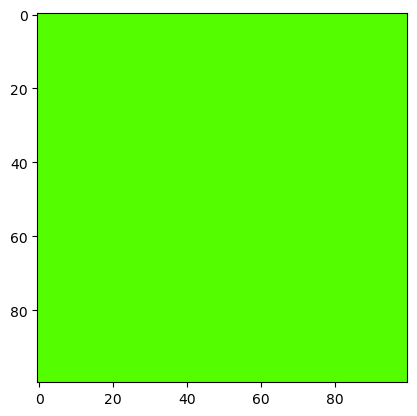

0


In [52]:
# おそらくエジプトらへんの導水路を表していると思われる
check = data[600:700, 700:800]
plt.imshow(check, cmap='prism_r')
plt.show()
lst = []
for i in range(2160):
    for j in range(4320):
        score = data[i,j]
        if score != 0:
            lst.append(score)
            print(i, j, score)
print(len(lst))

In [48]:
# meteorological forcing data should be also replaced
# it's done in /met/pre/extract_region.py

In [49]:
# save the file
save_flag = True
if save_flag is True:
    loadfile = file_path
    savefile = file_path.replace(SUF, tag)
    print(loadfile)
    print(savefile)
    data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
    tokyo = data[upperindex:lowerindex, leftindex:rightindex]
    tokyo.astype(np.float32).tofile(savefile)

/home/kajiyama/H08/H08_20230612/map/org/K14/in__3___20000000.gl5.org
/home/kajiyama/H08/H08_20230612/map/org/K14/in__3___20000000.tk5.org
